# Software Industry Salary Analysis
This notebook explores factors affecting salaries of software industries, identifies top-paying locations, and uses a heatmap to highlight relationships. 

## Importing Libraries and Reading Files

In [1]:
# Importing packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('Downloads/Salary_Dataset_with_Extra_Features.csv')
data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


## Statistical Summary

In [3]:
# basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [4]:
# selecting only numerical data
num_data = data.select_dtypes(include=['float64', 'int64'])

# Summary Statistics
print(num_data.describe())

# Showing Mean, Meadian, Standard Deviation, Skewness and Kurtosis of Every Column
for column in num_data.columns:
    print(f"\n{column}:")
    print(f"Mean: {num_data[column].mean()}")
    print(f"Median: {num_data[column].median()}")
    print(f"Standard Deviation: {num_data[column].std()}")
    print(f"Skewness: {num_data[column].skew()}")
    print(f"Kurtosis: {num_data[column].kurt()}")

             Rating        Salary  Salaries Reported
count  22770.000000  2.277000e+04       22770.000000
mean       3.918213  6.953872e+05           1.855775
std        0.519675  8.843990e+05           6.823668
min        1.000000  2.112000e+03           1.000000
25%        3.700000  3.000000e+05           1.000000
50%        3.900000  5.000000e+05           1.000000
75%        4.200000  9.000000e+05           1.000000
max        5.000000  9.000000e+07         361.000000

Rating:
Mean: 3.9182125603864733
Median: 3.9
Standard Deviation: 0.5196753451613456
Skewness: -1.0145912297117903
Kurtosis: 3.9420502151553576

Salary:
Mean: 695387.2112428634
Median: 500000.0
Standard Deviation: 884399.0136761819
Skewness: 46.797979949441036
Kurtosis: 4574.766100647107

Salaries Reported:
Mean: 1.8557751427316644
Median: 1.0
Standard Deviation: 6.823668180058011
Skewness: 31.7419301267017
Kurtosis: 1342.8551074566726


## Identifying factor affect salaries of Software Enginners

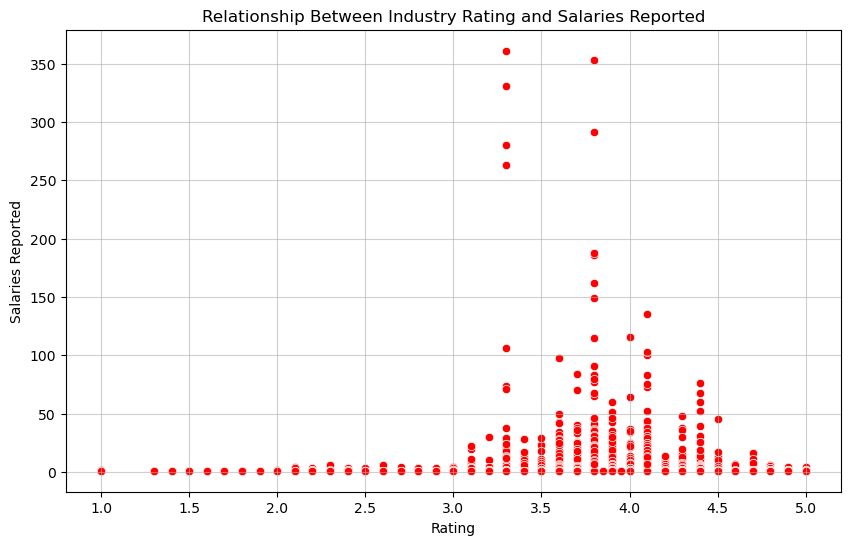

In [15]:
# Function to create a scatter plot showing the relationship between salaries reported and industry rating
def plot_salary_reported_vs_rating():
    """Plots a scatter plot of salaries reported versus industry rating."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data, x = "Rating", y = "Salaries Reported", color = 'red')
    plt.title('Relationship Between Industry Rating and Salaries Reported')
    plt.xlabel('Rating')
    plt.ylabel('Salaries Reported')
    plt.grid(True, alpha=0.6)
    plt.show()

# Calling function
plot_salary_reported_vs_rating()

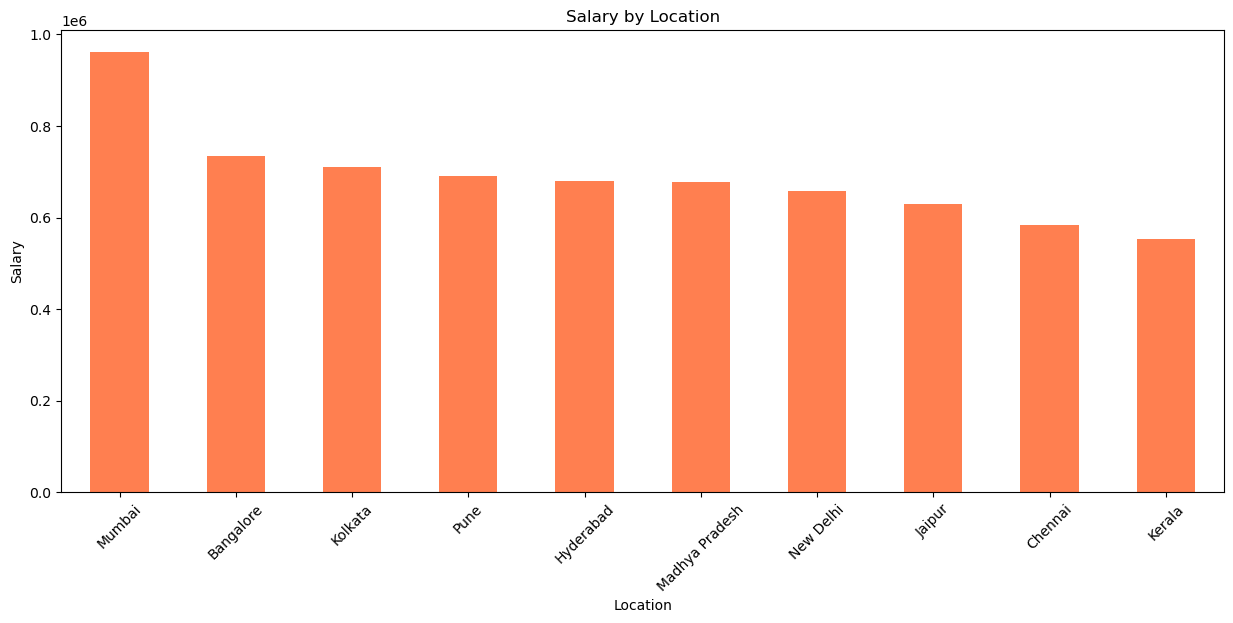

In [20]:
# Function to plot salaries by location
def plot_salary_by_location():
    """Plots a bar chart of salaries by location."""
    salary_location = data.groupby('Location')['Salary'].mean().sort_values(ascending=False)
    plt.figure(figsize=(15, 6))
    salary_location.plot(kind='bar', color='coral')
    plt.title('Salary by Location')
    plt.ylabel('Salary')
    plt.xlabel('Location')
    plt.xticks(rotation=45)
    plt.show()

# Calling the function to plot bar chart
plot_salary_by_location()

## Correlation Matrix

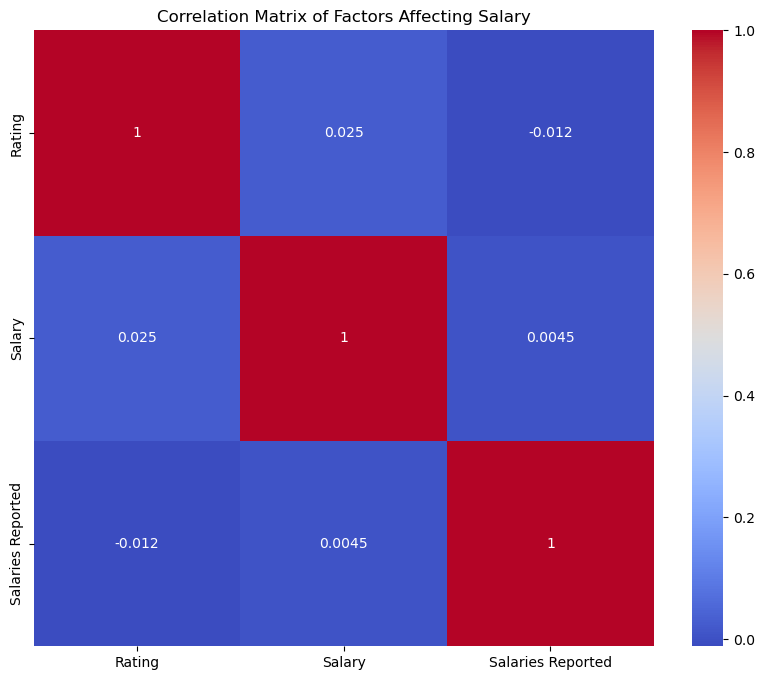

In [21]:
# Compute the correlation matrix
corr_matrix = num_data.corr()
# Function to plot the correlation heatmap
def plot_correlation_heatmap():
    """Plots a heatmap of the correlation matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Factors Affecting Salary')
    plt.show()

# Call the function to plot the heatmap
plot_correlation_heatmap()